In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
test_sizes = [1,5,10,25,50,75,100,125,140,145,149]

In [3]:
def fpr(sample,target_class=0):
    # Actual cases
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)

    # Cases we are not interested in
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    # Definition of the false positive rate (want this to be low)
    try:
        false_positive_ratio = float(num_false_positives) / (float(num_false_positives) + float(num_true_negatives))
    except:
        false_positive_ratio = 0.0
    return false_positive_ratio * 100.0

# Runs the FPR calculation on -each- random
# sample - the average of these sample FPRs
# is the False Positive Rate
def calc_fpr(data,target_class=0,N=100):
    sample_size = int(data.shape[0] / N)
    nsamples = int(data.shape[0]/sample_size)
    return [fpr(data[s*sample_size:(s*sample_size)+sample_size,:],target_class) for s in range(0,nsamples)]

In [19]:
# Single data set example - N=100 (2500 lines in the file)
np.mean(calc_fpr(np.loadtxt("iris-results-25.txt"),2))

4.373184611226407

In [20]:
fprs = np.array([calc_fpr(np.loadtxt("iris-results-%d.txt"%x),2) for x in test_sizes]).transpose()

In [21]:
means = np.mean(fprs,0)
means

array([ 4.        ,  4.2031746 ,  4.37318461,  4.20574606,  4.24662569,
        4.37426271,  9.5741769 , 18.71530966, 35.        ])

In [22]:
stderr = np.std(fprs,0) / np.sqrt(100)
stderr

array([1.95959179, 0.75253931, 0.49133428, 0.33263356, 0.29404996,
       0.39495969, 1.00586891, 1.83362681, 4.76969601])

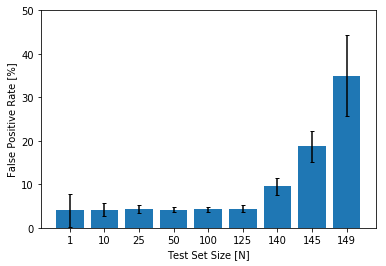

In [25]:
plt.bar([str(x) for x in test_sizes],means,yerr=1.96*stderr,capsize=2)
plt.ylim(0,50)
plt.xlabel("Test Set Size [N]")
plt.ylabel("False Positive Rate [%]")
plt.show()